In [1]:
!pip install rplanpy

<ipython-input-4-a0e418bb172f>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread('/content/drive/MyDrive/RPLAN/floorplan_dataset/1.png')


IndexError: ignored

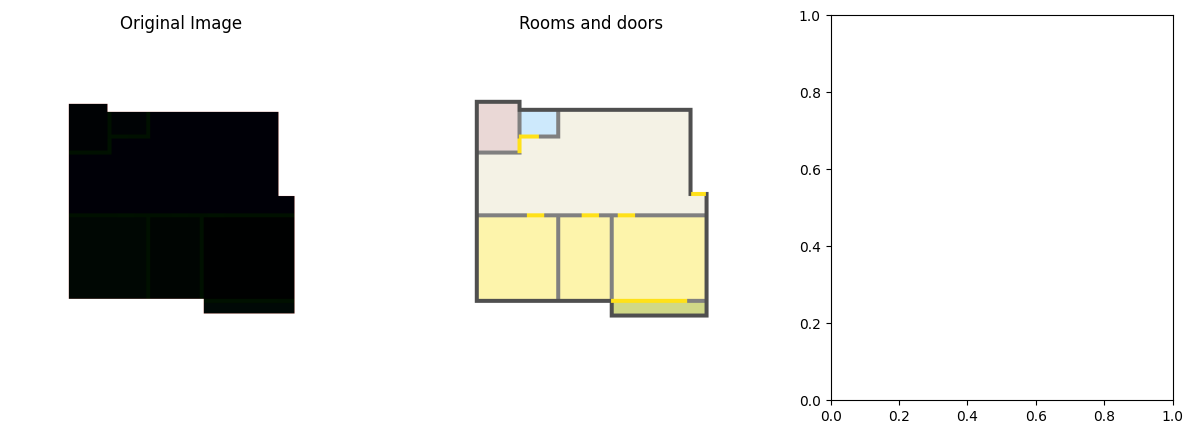

In [4]:
import rplanpy
import imageio
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3,figsize=(15,5))
data=rplanpy.data.RplanData('/content/drive/MyDrive/RPLAN/floorplan_dataset/1.png')
image=imageio.imread('/content/drive/MyDrive/RPLAN/floorplan_dataset/1.png')
ax[0].imshow(image,cmap='gray')
ax[0].axis("off")
ax[0].set_title("Original Image")
rplanpy.plot.plot_floorplan(data, ax=ax[1], title="Rooms and doors")
rplanpy.plot.plot_floorplan_graph(
    data=data, with_colors=True, edge_label='door', ax=ax[2],
    title="Building graph"
)
plt.tight_layout()
plt.show()

In [ ]:
properties=rplanpy.data.RplanData.get_rooms_with_properties(data)

In [ ]:
import numpy as np
extracted_data=[]
for key, value in properties.items():
    category = value['category']
    bounding_box = value['bounding_box']
    bounding_box_scaled = bounding_box / 256.0
    row = [category] + list(bounding_box_scaled)
    extracted_data.append(row)
numpy_array = np.array(extracted_data)
print(numpy_array)

[[1.         0.62890625 0.28125    0.86328125 0.48828125]
 [3.         0.5078125  0.28125    0.6171875  0.421875  ]
 [0.         0.109375   0.43359375 0.796875   0.72265625]
 [7.         0.33984375 0.28125    0.49609375 0.48828125]
 [2.         0.20703125 0.44921875 0.328125   0.56640625]
 [9.         0.80859375 0.5        0.89453125 0.72265625]]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import rplanpy
import numpy as np
extracted_data=[]
max_categories=8
for i in range(0,1000):
    #layout_data=[]
    layout_data = np.zeros((max_categories, 5), dtype=float)
    filename = str(i) + '.png'
    image_path = os.path.join("/content/drive/MyDrive/RPLAN/sample_dataset/", filename)

    if os.path.exists(image_path):
      data=rplanpy.data.RplanData("/content/drive/MyDrive/RPLAN/sample_dataset/"+filename)
      properties=rplanpy.data.RplanData.get_rooms_with_properties(data)

      category_index = 0

      for key, value in properties.items():
        category = value['category']+1
        bounding_box = value['bounding_box']

        bottom_right_x, bottom_right_y = bounding_box[-2:]
        width = bottom_right_x - bounding_box[0]
        height = bottom_right_y - bounding_box[1]
        bounding_box_scaled = [bounding_box[0] / 256.0, bounding_box[1] / 256.0, width / 256.0, height / 256.0]
        row = [category] + list(bounding_box_scaled)
        layout_data[category_index] = np.array(row, dtype=float)
        #layout_data.append(np.array(row,'float'))
        #print(type(row))
        category_index+=1
    else:
      print(i," not present")
    num_categories=np.array(layout_data).shape[0]
    #print(num_categories)
    # if(num_categories<max_categories):
    #   layout_data.append([0,0,0,0,0]*(max_categories-num_categories))
    extracted_data.append(layout_data)
numpy_array = np.array(extracted_data)
print(numpy_array)
np.save("/content/drive/MyDrive/numpy.npy",numpy_array)

/usr/local/lib/python3.10/dist-packages/rplanpy/data.py:53: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  c = stats.mode(
/usr/local/lib/python3.10/dist-packages/rplanpy/data.py:58: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  i = stats.mode(


[[[ 2.          0.62890625  0.28125     0.234375    0.20703125]
  [ 4.          0.5078125   0.28125     0.109375    0.140625  ]
  [ 1.          0.109375    0.43359375  0.6875      0.2890625 ]
  ...
  [10.          0.80859375  0.5         0.0859375   0.22265625]
  [ 0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 2.          0.52734375  0.56640625  0.23828125  0.265625  ]
  [ 6.          0.52734375  0.41015625  0.23828125  0.14453125]
  [ 8.          0.52734375  0.171875    0.23828125  0.2265625 ]
  ...
  [10.          0.77734375  0.56640625  0.03125     0.265625  ]
  [ 1.          0.21875     0.171875    0.296875    0.66015625]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 4.          0.08984375  0.63671875  0.1484375   0.10546875]
  [ 3.          0.08984375  0.26171875  0.21484375  0.12109375]
  [ 8.          0.64453125  0.46484375  0.1796875   0.2109375 ]
  ...
  [ 1.          0.

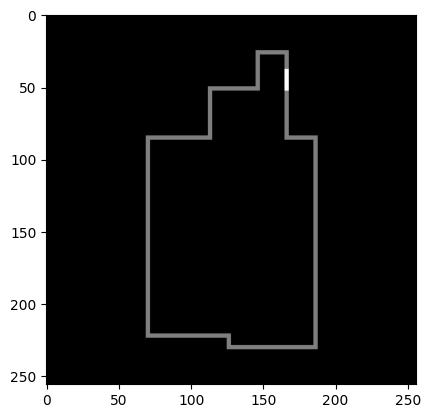

In [ ]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/content/drive/MyDrive/RPLAN/sample_dataset/0.png')
plt.imshow(img[:,:,2],cmap='gray')

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
import numpy as np

# Extract the binary mask for the specific room
room_mask = (img[:,:,0] == 3).astype(np.uint8)
print(room_mask)

# Calculate the area in pixels and square meters
area_pixels = np.sum(room_mask)
print(area_pixels)
area_meters = area_pixels * conversion_factor**2

print(f"Room Area: {area_meters} square meters")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2714
Room Area: 13.4176025390625 square meters


In [ ]:
total_plot_size_meters = 18  # meters
total_image_size_pixels = 256  # pixels

conversion_factor = total_plot_size_meters / total_image_size_pixels
print(conversion_factor)

0.0703125


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras import backend as k

import numpy as np
import json
import os
import gc

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Patch

In [24]:
publaynet_data = np.load("/content/drive/MyDrive/numpy10k.npy",allow_pickle=True)

In [26]:
publaynet_data = np.load("/content/drive/MyDrive/publaynet.npy",allow_pickle=True)

In [25]:
publaynet_data.shape

(10000, 9, 5)

In [5]:
class MMHSALayer(Layer):
    '''
    **Masked Multiheaded Self Attention Layer**

    heads : Specify the number of heads
    '''
    def __init__(self,heads=8):
        super(MMHSALayer, self).__init__()
        self.heads = heads

    def build(self,input_shape):
        self.model_dim = input_shape[-2]
        self.k = self.add_weight(shape=(self.heads,self.model_dim,self.model_dim),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="Key")
        self.q = self.add_weight(shape=(self.heads,self.model_dim,self.model_dim),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="Query")
        self.v = self.add_weight(shape=(self.heads,self.model_dim,self.model_dim),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="Value")
        self.o = self.add_weight(shape=(self.model_dim,self.model_dim*self.heads),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="Heads")

    def call(self,inputs):
        mask_shape = inputs.shape[-1]

        mask_0 = np.ones((mask_shape,mask_shape))
        for i in range(mask_shape):
            for j in range(mask_shape):
                if (i>j):
                    mask_0[i][j]=0
        self.mask_0 = tf.constant(mask_0,dtype=tf.float32)

        mask_inf = np.zeros((mask_shape,mask_shape))
        for i in range(mask_shape):
            for j in range(mask_shape):
                if (i>j):
                    mask_inf[i][j]=-10000000000
        self.mask_inf = tf.constant(mask_inf,dtype=tf.float32)

        inputs = tf.expand_dims(inputs,1)

        key=tf.matmul(self.k,inputs)
        que=tf.matmul(self.q,inputs)
        val=tf.matmul(self.v,inputs)

        Z=tf.matmul(tf.transpose(key,perm=[0,1,3,2]),que)*(1/np.sqrt(self.model_dim))
        W=tf.multiply(Z,self.mask_0)
        W=tf.add(W,self.mask_inf)
        W=tf.keras.activations.softmax(W,axis=1)
        W=tf.multiply(W,self.mask_0)
        W=tf.matmul(val,W)

        W = tf.reshape(W,(inputs.shape[0],self.model_dim*self.heads,mask_shape))

        ans = W

        ans = tf.matmul(self.o,ans)
        ans=tf.expand_dims(ans,0)

        ans = tf.squeeze(ans,axis=0)

        return ans

class Dense2D(Layer):
    '''
    **2-Dimensional Dense Layer**
    Applies dense layer column-wise (shared weights). Returns the column size of units.

    units : Specify the number of output units (column length)
    '''
    def __init__(self,units):
        super(Dense2D, self).__init__()
        self.units = units

    def build(self,input_shape):
        input_len = input_shape[-2]

        self.w = self.add_weight(shape=(self.units,input_len),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="dense2dw")

    def call(self,inputs,activation = None):

        ans = tf.matmul(self.w,inputs)

        return ans

class FFLayer(Layer):
    '''
    **Feed Forward Layer**
    Applies dense layer column-wise (shared weights), followed by a ReLU Layer, followed by another dense layer column-wise (shared weights). Returns the same column size.

    dff : Specify the number of units (column length) in the middle layer
    dropout : Dropout Rate
    '''
    def __init__(self, dff=2048, dropout=0.1):
        super(FFLayer,self).__init__()
        self.dff = dff
        self.dropout = dropout

    def build(self,input_shape):
        self.dropout = tf.keras.layers.Dropout(self.dropout)
        self.dout = input_shape[-2]

        self.w1 = self.add_weight(shape=(self.dff,self.dout),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="ffw1")
        self.w2 = self.add_weight(shape=(self.dout,self.dff),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="ffw2")
        self.b1 = self.add_weight(shape=(self.dff,1),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="ffb1")
        self.b2 = self.add_weight(shape=(self.dout,1),
                                 initializer='random_normal',
                                 trainable=True,
                                 name="ffb2")

    def call(self,inputs):

        ans = tf.add(tf.matmul(self.w1,inputs),self.b1)
        ans = tf.keras.activations.relu(ans)
        ans = tf.add(tf.matmul(self.w2,ans),self.b2)

        ans = self.dropout(ans)

        return ans

class ANLayer(Layer):
    '''
    **Add and Normalize Layer**
    Adds and then Normalizes column wise.
    '''
    def __init__(self):
        super(ANLayer,self).__init__()
        self.Normal = tf.keras.layers.LayerNormalization(axis=1)

    def call(self,inputs1,inputs2):
        sum = tf.add(inputs1,inputs2)
        ans=self.Normal(sum)
        return ans

In [6]:
class LTModel(Model):
    def __init__(self, input_shape, layers, heads, dff, model_dim, dropout):
        super(LTModel, self).__init__()

        self.emb = Dense2D(model_dim)

        self.SA = []
        self.AN1 = []
        self.FF = []
        self.AN2 = []

        for i in range(layers):
            self.SA.append(MMHSALayer(heads))
            self.AN1.append(ANLayer())
            self.FF.append(FFLayer(dff, dropout))
            self.AN2.append(ANLayer())

        self.deemb = Dense2D(input_shape)
        self.sm = tf.keras.layers.Softmax(axis=1)

    def call(self, x):
        x = self.emb(x)

        for i in range(len(self.SA)):
            y = self.SA[i](x)
            x = self.AN1[i](x,y)
            y = self.FF[i](x)
            x = self.AN2[i](x,y)

        x = self.deemb(x)
        x = self.sm(x)

        return x

In [7]:
class LayoutTransformer:

    def __init__(self, n_classes, class_labels=None, n_anchors=(32,32), d=512, n_layers=6, n_heads=8, dff=2048, dropout=0.1):
        self.n_classes = n_classes+2
        self.n_anchors = n_anchors
        self.d = d
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.dff = dff
        self.dropout = dropout
        self.n_row = n_anchors[0]
        self.n_col = n_anchors[1]
        self.input_dim = 2+n_classes+2*(n_anchors[0]+n_anchors[1])
        self.model = LTModel(self.input_dim, model_dim=d, layers=n_layers, heads=n_heads, dff=dff, dropout=dropout)
        self.loss_his = []
        self.lr_his = []
        self.train_data_his = []
        if class_labels == None:
            self.labels = range(1,n_classes+1)
        else:
            self.labels = class_labels


    def compile(self, lr=1e-5):
        self.model.compile(loss=tf.keras.losses.KLDivergence(),
                           metrics = [tf.keras.losses.KLDivergence()],
                           optimizer = tf.keras.optimizers.Adam(learning_rate=lr))


    def build(self):
        self.model.build((1,self.input_dim,1))


    def summary(self):
        self.build()
        print(self.model.summary())


    def train(self, epochs, batch_size=1, train_data_index="All", rlrop_factor=0.5, rlrop_patience=1000, rlrop_min_delta=0.001):
        if train_data_index == "All":
            train_data_index = range(self.data.shape[0])
        rlrop = tf.keras.callbacks.ReduceLROnPlateau(factor=rlrop_factor,patience=rlrop_patience,verbose=1,min_delta=rlrop_min_delta,monitor='kl_divergence')
        callbacks = [rlrop]
        history = self.model.fit(x=tf.convert_to_tensor(self.x_data[train_data_index]), y=tf.convert_to_tensor(self.y_data[train_data_index]), epochs=epochs, batch_size=batch_size, callbacks=callbacks)
        self.loss_his.extend(history.history['loss'])
        self.lr_his.extend(history.history['lr'])
        for i in range(epochs):
            self.train_data_his.append(len(train_data_index))


    def load_weights(self, folder_path, filename):
        self.build()
        self.model.load_weights(folder_path + '/' + str(filename) + '.h5')
        his = json.loads(open(folder_path + '/' + str(filename) + '.json').read())

        self.loss_his = his['loss']
        self.train_data_his = his['data']
        self.lr_his = his['lr']


    def save_weights(self, folder_path, filename):
        his = json.dumps({'loss':list(np.array(self.loss_his,dtype='float')),'data':list(np.array(self.train_data_his,dtype='float')),'lr':list(np.array(self.lr_his,dtype='float'))})
        open(folder_path + '/' + str(filename) + '.json','w').write(his)
        self.model.save_weights(folder_path + '/' + str(filename) + '.h5')


    def predict(self, input):
        input = tf.convert_to_tensor(input, dtype='float32')
        return self.model(input).numpy()


    def load_data(self, data, rows, cols, e=0.1):
        # Make number of boxes equal in each document
        max_box = 0
        for doc in data:
            max_box = max(max_box,len(doc))

        for doc in range(len(data)):
            while (len(data[doc])<max_box):
                data[doc].append([self.n_classes-1,0,0,0,0])

        #No change
        self.orig_data = np.array(data,dtype='float32')
        data = np.array(data,dtype='float32')

        data[:,:,1] = data[:,:,1]/cols*(self.n_col-1) #shape: (1000,9)
        data[:,:,2] = data[:,:,2]/rows*(self.n_row-1)
        data[:,:,3] = data[:,:,3]/cols*(self.n_col-1)
        data[:,:,4] = data[:,:,4]/rows*(self.n_row-1)

        data = np.array(data,dtype='int')

        # Sorting
        for i in range(data.shape[0]):
            box_num = data[i].shape[0]

            c=0
            for j in data[i]:
                if j[3]==0 and j[4]==0:
                    break
                c = c+1 #total number of valid boxes

            order = [*list(data[i][0:c,3].argsort()),*range(c,box_num)] # 4 Width (Col)
            data[i] = np.array(data[i,order])
            order = [*list(data[i][0:c,4].argsort()),*range(c,box_num)] # 3 Height (Row)
            data[i] = np.array(data[i,order])
            order = [*list(data[i][0:c,1].argsort()),*range(c,box_num)] # 2 X-Pos (Col)
            data[i] = np.array(data[i,order])
            order = [*list(data[i][0:c,2].argsort()),*range(c,box_num)] # 1 Y-Pos (Row)
            data[i] = np.array(data[i,order])

        self.data = data

        # One hot encoding
        onehot_data = []

        for doc in data:
            cur_data = []
            for box in doc:
                cur_cur_data = list(np.zeros(self.input_dim))
                cur_cur_data[box[0]] = 1
                cur_cur_data[box[1]+self.n_classes] = 1
                cur_cur_data[box[2]+self.n_classes+self.n_col] = 1
                cur_cur_data[box[3]+self.n_classes+self.n_col+self.n_row] = 1
                cur_cur_data[box[4]+self.n_classes+self.n_col*2+self.n_row] = 1
                cur_data.append(cur_cur_data)
            onehot_data.append(cur_data)

        self.onehot_data = np.array(onehot_data, dtype='int')

        # x_data with <bos> and y_data with <eos>
        x_data = []
        y_data = []

        for doc in onehot_data:
            bos = list(np.zeros(self.input_dim))
            bos[0]=1
            x = [bos,*doc]
            x = np.array(x).T
            x_data.append(x)

            eos = list(np.zeros(self.input_dim))
            eos[self.n_classes-1] = 1
            y = [*doc,eos]
            for box in y:
                for k in range(0, self.n_classes):
                    box[k] = (1 - e) * box[k] + e / self.n_classes
                for k in range(self.n_classes, self.n_classes+self.n_col):
                    box[k] = (1 - e) * box[k] + e / self.n_col
                for k in range(self.n_classes+self.n_col, self.n_classes+self.n_col+self.n_row):
                    box[k] = (1 - e) * box[k] + e / self.n_row
                for k in range(self.n_classes+self.n_col+self.n_row, self.n_classes+2*self.n_col+self.n_row):
                    box[k] = (1 - e) * box[k] + e / self.n_col
                for k in range(self.n_classes+2*self.n_col+self.n_row, self.n_classes+2*self.n_col+2*self.n_row):
                    box[k] = (1 - e) * box[k] + e / self.n_row
            y = np.array(y).T
            y_data.append(y)

        self.x_data = np.array(x_data,dtype="float32")
        self.y_data = np.array(y_data,dtype="float32")


    def onehot(self,box, prob=[-1,-1,-1,-1,-1]):
        p = 1
        c = np.argsort(box[0:self.n_classes],axis=0)[prob[0]]
        x = np.argsort(box[self.n_classes:self.n_classes+self.n_col],axis=0)[prob[1]] + self.n_classes
        y = np.argsort(box[self.n_classes+self.n_col:self.n_classes+self.n_col+self.n_row],axis=0)[prob[2]] + self.n_classes+self.n_col
        w = np.argsort(box[self.n_classes+self.n_col+self.n_row:self.n_classes+2*self.n_col+self.n_row],axis=0)[prob[3]] + self.n_classes+self.n_col+self.n_row
        h = np.argsort(box[self.n_classes+2*self.n_col+self.n_row:self.n_classes+2*self.n_col+2*self.n_row],axis=0)[prob[4]] + self.n_classes+2*self.n_col+self.n_row
        p = p*box[c][0]*box[x][0]*box[y][0]*box[w][0]*box[h][0]
        res = np.zeros((self.input_dim,1))
        res[c,0]=1
        res[x,0]=1
        res[y,0]=1
        res[w,0]=1
        res[h,0]=1
        return (res,p)


    def sort_prob(self,docs):
        p = [int(p) for box,p in docs]
        p = np.argsort(p)[::-1]
        res = []
        for i in p:
            res.append(docs[i])
        return res


    def get_color(self,c):
        color_key = ["#00ffff","#fff5ee","#dc143c","#ffff00","#00ff00","#ff00ff","#1e90ff",
                     "#ff1493","#8b008b","#ff4500","#8b4513","#808000","#483d8b","#008000",
                     "#000080","#9acd32","#ffa500","#ba55d3","#00fa9a","#dc143c","#0000ff",
                     "#f08080","#f0e68c","#dda0dd","#f2dcb3","#f9cfcc"]
        return color_key[int(c)]

    def draw_layout(self,ax, doc, prob):
        for spine in ax.spines.values():
            spine.set_edgecolor('green')
            spine.set_linewidth(1)
        ax.set_xlim(0,self.n_col-1)
        ax.set_ylim(0,self.n_row-1)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.invert_yaxis()

        for box in doc.T:
            c = np.argmax(box[0:self.n_classes],axis=0)
            x = np.argmax(box[self.n_classes:self.n_classes+self.n_col],axis=0)
            y = np.argmax(box[self.n_classes+self.n_col:self.n_classes+self.n_col+self.n_row],axis=0)
            w = np.argmax(box[self.n_classes+self.n_col+self.n_row:self.n_classes+2*self.n_col+self.n_row],axis=0)
            h = np.argmax(box[self.n_classes+2*self.n_col+self.n_row:self.n_classes+2*self.n_col+2*self.n_row],axis=0)
            r = plt.Rectangle((x,y),w,h, fc=self.get_color(c)+"72", ec=self.get_color(c),linewidth=1)
            if c==self.n_classes-1:
                break

            ax.add_patch(r)


    def print_layouts(self,docs,min_boxes,beams_to_print,path=None,ratio_h_w=1.5):
        plt.style.use('dark_background')
        doc_num = docs[1]
        docs = docs[0]
        width = beams_to_print+3
        height = ratio_h_w*(len(docs))+4
        fig = plt.figure(figsize=(width,height),facecolor="#000000",dpi=100)

        height_ratios = [0.8/(height),0.9/(height),(height-1.7)/height]
        width_ratios = [(width-9)/(2*width),3/width,3/width,3/width,(width-9)/(2*width)]

        spec = gridspec.GridSpec(ncols=5, nrows=3,
                         width_ratios=width_ratios,
                         height_ratios=height_ratios,
                         wspace=5/width,left=0.05/width,right=(width-0.05)/width,top=0.98,bottom=0.02,hspace=0.05)

        ax = fig.add_subplot(spec[6])

        ax.plot(range(1,len(self.loss_his)+1),self.train_data_his,'-',color='red',linewidth=3)
        ax.set_xlabel("Epochs")
        ax.set_title("Train Data")

        ax = fig.add_subplot(spec[7])

        ax.plot(range(1,len(self.loss_his)+1),self.loss_his,'-',color='blue',linewidth=3)
        ax.set_xlabel("Epochs")
        ax.set_title("KL Loss")

        ax = fig.add_subplot(spec[8])

        ax.plot(range(1,len(self.loss_his)+1),self.lr_his,'-',color='green',linewidth=3)
        ax.set_xlabel("Epochs")
        ax.set_title("LR")
        ax.set_yscale("log")

        height_ratios = np.ones(len(docs)+2)*ratio_h_w/(height)
        height_ratios[0] = 3.8/(height)
        height_ratios[1] = 0.2/(height)

        spec = gridspec.GridSpec(ncols=1, nrows=len(docs)+2,
                         width_ratios=[1],
                         height_ratios=height_ratios,
                         wspace=0.05,left=0.02,right=0.98,top=0.98,bottom=0.02,hspace=0.05)

        ax = fig.add_subplot(spec[0])
        ax.axis('off')
        ax.invert_yaxis()
        ax.text(0.5,0,"Plot",ha='center',va='bottom',fontsize=20)
        doc_nums=""
        for i in doc_num:
            doc_nums = doc_nums + ", " + str(i)
        doc_nums = doc_nums[2:]
        doc_nums = "Documents Predicted: " + doc_nums
        props = "Classes: " + str(self.n_classes-2) + "; Epochs: " + str(len(self.loss_his))
        params = "n_anchors = " + str(self.n_anchors) + "; d = " + str(self.d) + "; n_layers = " + str(self.n_layers) + "; n_heads = " + str(self.n_heads) + "; dff = " + str(self.dff) + "; dropout = " + str(self.dropout)
        ax.text(0.5,0.03,doc_nums+"\n"+props+"\n"+params,ha='center',va='top',fontsize=10)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        legend = []
        legend.append(Patch(facecolor=self.get_color(0)+"72", label='<bos>',ec=self.get_color(0),linewidth=1))
        for i in range(1,self.n_classes-1):
            legend.append(Patch(facecolor=self.get_color(i)+"72", label=self.labels[i-1],ec=self.get_color(i),linewidth=1))
        legend.append(Patch(facecolor=self.get_color(self.n_classes-1)+"72", label='<eos>',ec=self.get_color(self.n_classes-1),linewidth=1))
        ax.legend(handles=legend,ncol=5,loc=8)

        height_ratios = np.ones(len(docs)+1)*ratio_h_w/(height)
        height_ratios[0] = 4/(height)

        spec = gridspec.GridSpec(ncols=width, nrows=len(docs)+1,
                         width_ratios=np.ones(width),
                         height_ratios=height_ratios,
                         wspace=0.05,left=0.02,right=0.98,top=0.98,bottom=0.02,hspace=0.05)

        ax = fig.add_subplot(spec[0])
        ax.axis('off')
        ax.text(0.5,0,"Ground Truth",ha='center')

        ax = fig.add_subplot(spec[1])
        ax.axis('off')
        ax.text(0.5,0,"Input",ha='center')

        ax = fig.add_subplot(spec[2])
        ax.axis('off')
        ax.text(0.5,0,"Most Probable",ha='center')

        for i in range(1,beams_to_print+1):
            ax = fig.add_subplot(spec[i+2])
            ax.axis('off')
            ax.text(0.5,0,"Beam "+str(i),ha='center')

        for input_count,doc_list in enumerate(docs):

            ax = fig.add_subplot(spec[(input_count+1)*width])
            self.draw_layout(ax,doc_list[0][0],doc_list[0][1])
            ax = fig.add_subplot(spec[(input_count+1)*width+1])
            self.draw_layout(ax,doc_list[1][0],doc_list[1][1])
            ax = fig.add_subplot(spec[(input_count+1)*width+2])
            self.draw_layout(ax,doc_list[2][0],doc_list[2][1])

            doc_num=0
            for doc in range(3,len(doc_list)):
                if doc_num==beams_to_print:
                    break
                if (len(doc_list[doc][0][0])>=min_boxes):
                    ax = fig.add_subplot(spec[(input_count+1)*width+doc])
                    self.draw_layout(ax,doc_list[doc][0],doc_list[doc][1])
                    doc_num = doc_num+1
        if path!=None:
            plt.savefig(path, facecolor="#000000")
        plt.show()


    def layout_completion(self, initial_boxes_num=2, data_num_array=[0], beam_length=[1], max_boxes=10):
        x = self.x_data[data_num_array,:,0:initial_boxes_num]
        res = []

        for input_count,input in enumerate(x):
            input = np.array([input])
            most_prob_doc = [(input,1)]

            for step in range(max_boxes):
                cur = most_prob_doc.pop(0)
                pre = np.array([self.model(cur[0]).numpy()[0,:,-1]])
                (box,p) = self.onehot(pre.T,[-1,-1,-1,-1,-1])
                p=p*cur[1]
                cur_box = np.array([box])
                cur_doc = np.append(cur[0],cur_box,axis=2)

                most_prob_doc.append((cur_doc,p))

                if most_prob_doc[0][0][0,self.n_classes-1,-1]==1:
                    break

            docs = []
            q = [(input,1)]
            total_calc = 1
            for step in range(max_boxes):
                beam = 1
                if step<len(beam_length):
                    beam = beam_length[step]

                for i in range(len(q)):
                    cur_list = []
                    cur = q.pop(0)
                    for j in ([0] if beam==1 else [0,1,2,4,8,16]):
                        prob = []
                        temp = j
                        for k in range(5):
                            prob.insert(0,-1-temp%2)
                            temp = int(temp/2)

                        pre = np.array([self.model(cur[0]).numpy()[0,:,-1]])
                        (box,p) = self.onehot(pre.T,prob)

                        p=p*cur[1]
                        cur_box = np.array([box])
                        cur_doc = np.append(cur[0],cur_box,axis=2)

                        cur_list.append((cur_doc,p))

                    cur_list = self.sort_prob(cur_list)
                    for j in range(beam):
                        if cur_list[j][0][0,self.n_classes-1,-1]==1:
                            docs.append(cur_list[j])
                        else:
                            q.append(cur_list[j])

                    print("\r"+str(total_calc)+"  Left in Queue: "+str(len(q))+" ; "+"Current Shape: "+str(cur[0].shape)+" ; "+"Docs Prepared: "+str(len(docs)),end="")
                    total_calc = total_calc+1
            print("")

            docs = self.sort_prob(docs)

            res.append([(np.array([self.x_data[data_num_array[input_count]]]),1),(np.array([input[0]]),1),*most_prob_doc,*docs])

        return (res,data_num_array)

In [26]:
publay_model = LayoutTransformer(n_classes=11, class_labels=["None","Living room","Master room","Kitchen","Bathroom","Dining room",
              "Child room","Study room","Second room","Guest room","Balcony"])

In [27]:
publaynet_data.shape

(10000, 9, 5)

In [28]:
publay_model.load_data(publaynet_data[0:10000],rows=1,cols=1)

In [29]:
model = publay_model

epochs = 50
lrate = 1e-5

# Reduce LR on Plateau
min_delta = 0.001
patience = 20
factor = 0.95

count = 0
model.compile(lr=lrate)

for i in range(epochs):
    gc.collect()
    k.clear_session()
    try:
        if model.loss_his[-2]-model.loss_his[-1]<min_delta:
            count = count+1
    except:
        pass

    if count==patience:
        count = 0
        lrate = lrate*factor
        model.compile(lr=lrate)

    model.train(epochs=1, batch_size=1, train_data_index='All')
    if i>0 and i%5==0:
      model.save_weights('/content/drive/MyDrive','model'+str(i+1))

10000/10000 [==============================] - 212s 21ms/step - loss: 0.7966 - kl_divergence: 0.7966 - lr: 1.0000e-05


In [30]:
model.save_weights('/content/drive/MyDrive','model'+str(i+1))

In [32]:
publay_model.load_weights('/content/drive/MyDrive',"model50")

In [33]:
predictions = publay_model.layout_completion(data_num_array=range(10,20), initial_boxes_num=2, beam_length=[3,3,2], max_boxes=10)

121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18
121  Left in Queue: 0 ; Current Shape: (1, 141, 10) ; Docs Prepared: 18


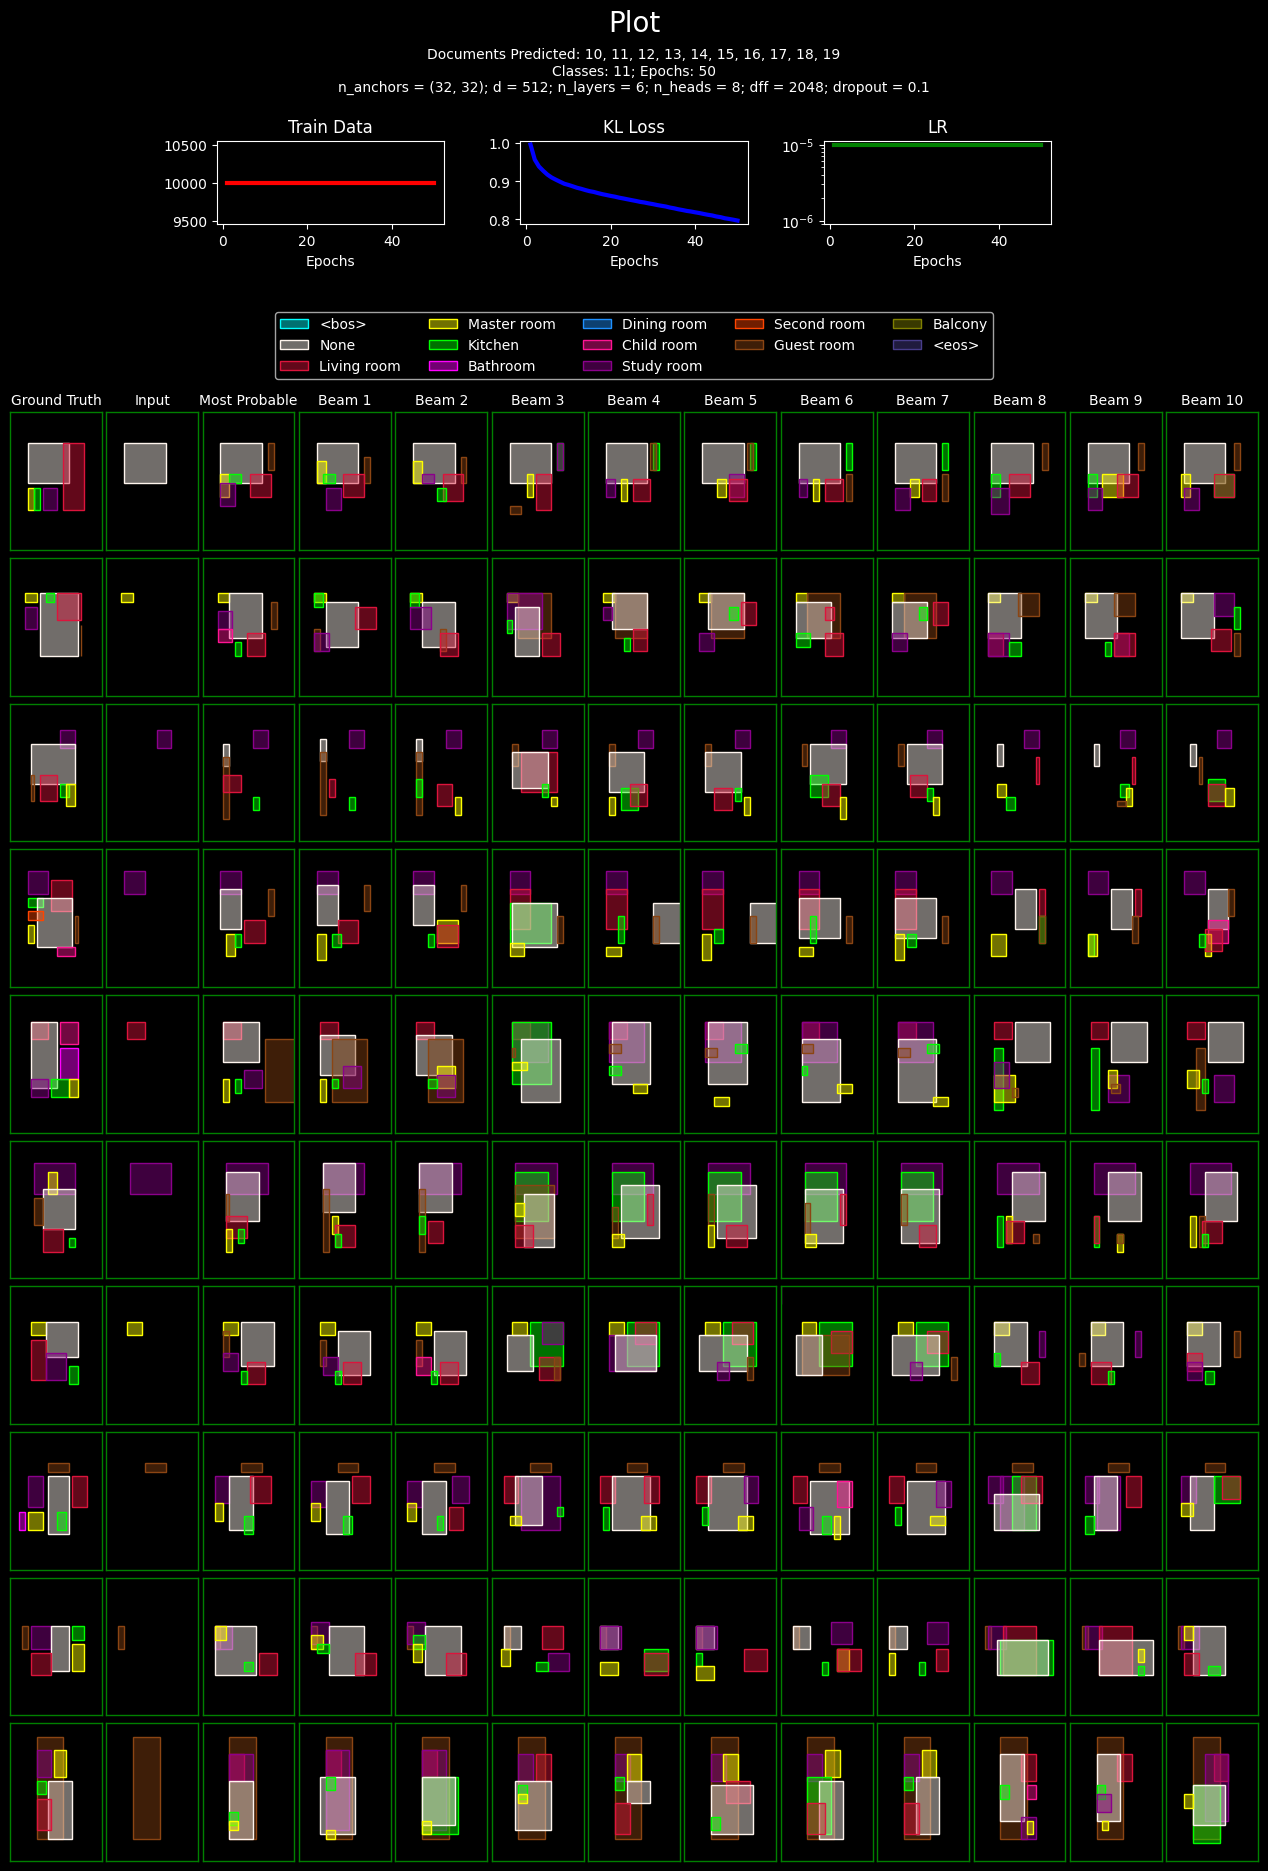

In [34]:
publay_model.print_layouts(predictions, min_boxes=2, beams_to_print=10 ,ratio_h_w=1.5)

In [3]:
import numpy as np
test=np.load('/content/drive/MyDrive/sorted_c1publay.npy',allow_pickle=True)


In [7]:
test[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.49054649, 0.35598027, 0.49352365, 0.55151665, 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.49091354, 0.652127  , 0.84995106, 0.0219852 , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.49060359, 0.78422935, 0.35823817, 0.17755857, 0.        ,
        0.        , 0.        , 0.        , 1.        ],
